In [1]:
# Import the library
import pyrosm

# Print information about the basic usage of the `OSM` reader object
help(pyrosm.OSM.__init__)

Help on function __init__ in module pyrosm.pyrosm:

__init__(self, filepath, bounding_box=None)
    Initialize self.  See help(type(self)) for accurate signature.



C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [6]:
import pyrosm


# Initialize the OSM object 
osm = pyrosm.OSM(r'D:\Nara\Samarkand\France.osm.pbf')

# See the type
print("Type of 'osm' instance: ", type(osm))

Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


## Roads

<AxesSubplot:>

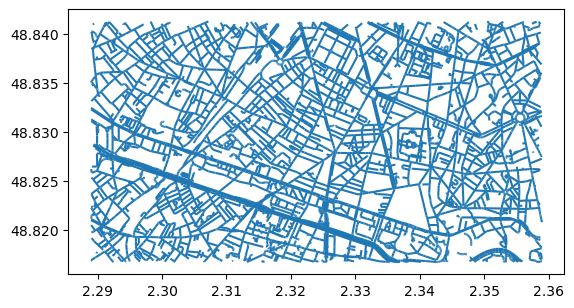

In [7]:
# Read all drivable roads
# =======================
drive_net = osm.get_network(network_type="driving")
drive_net.plot()

C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


<AxesSubplot:>

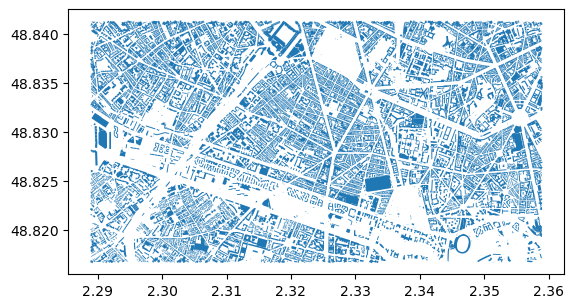

In [8]:
buildings = osm.get_buildings()
buildings.plot()

C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\pyrosm\pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(
C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


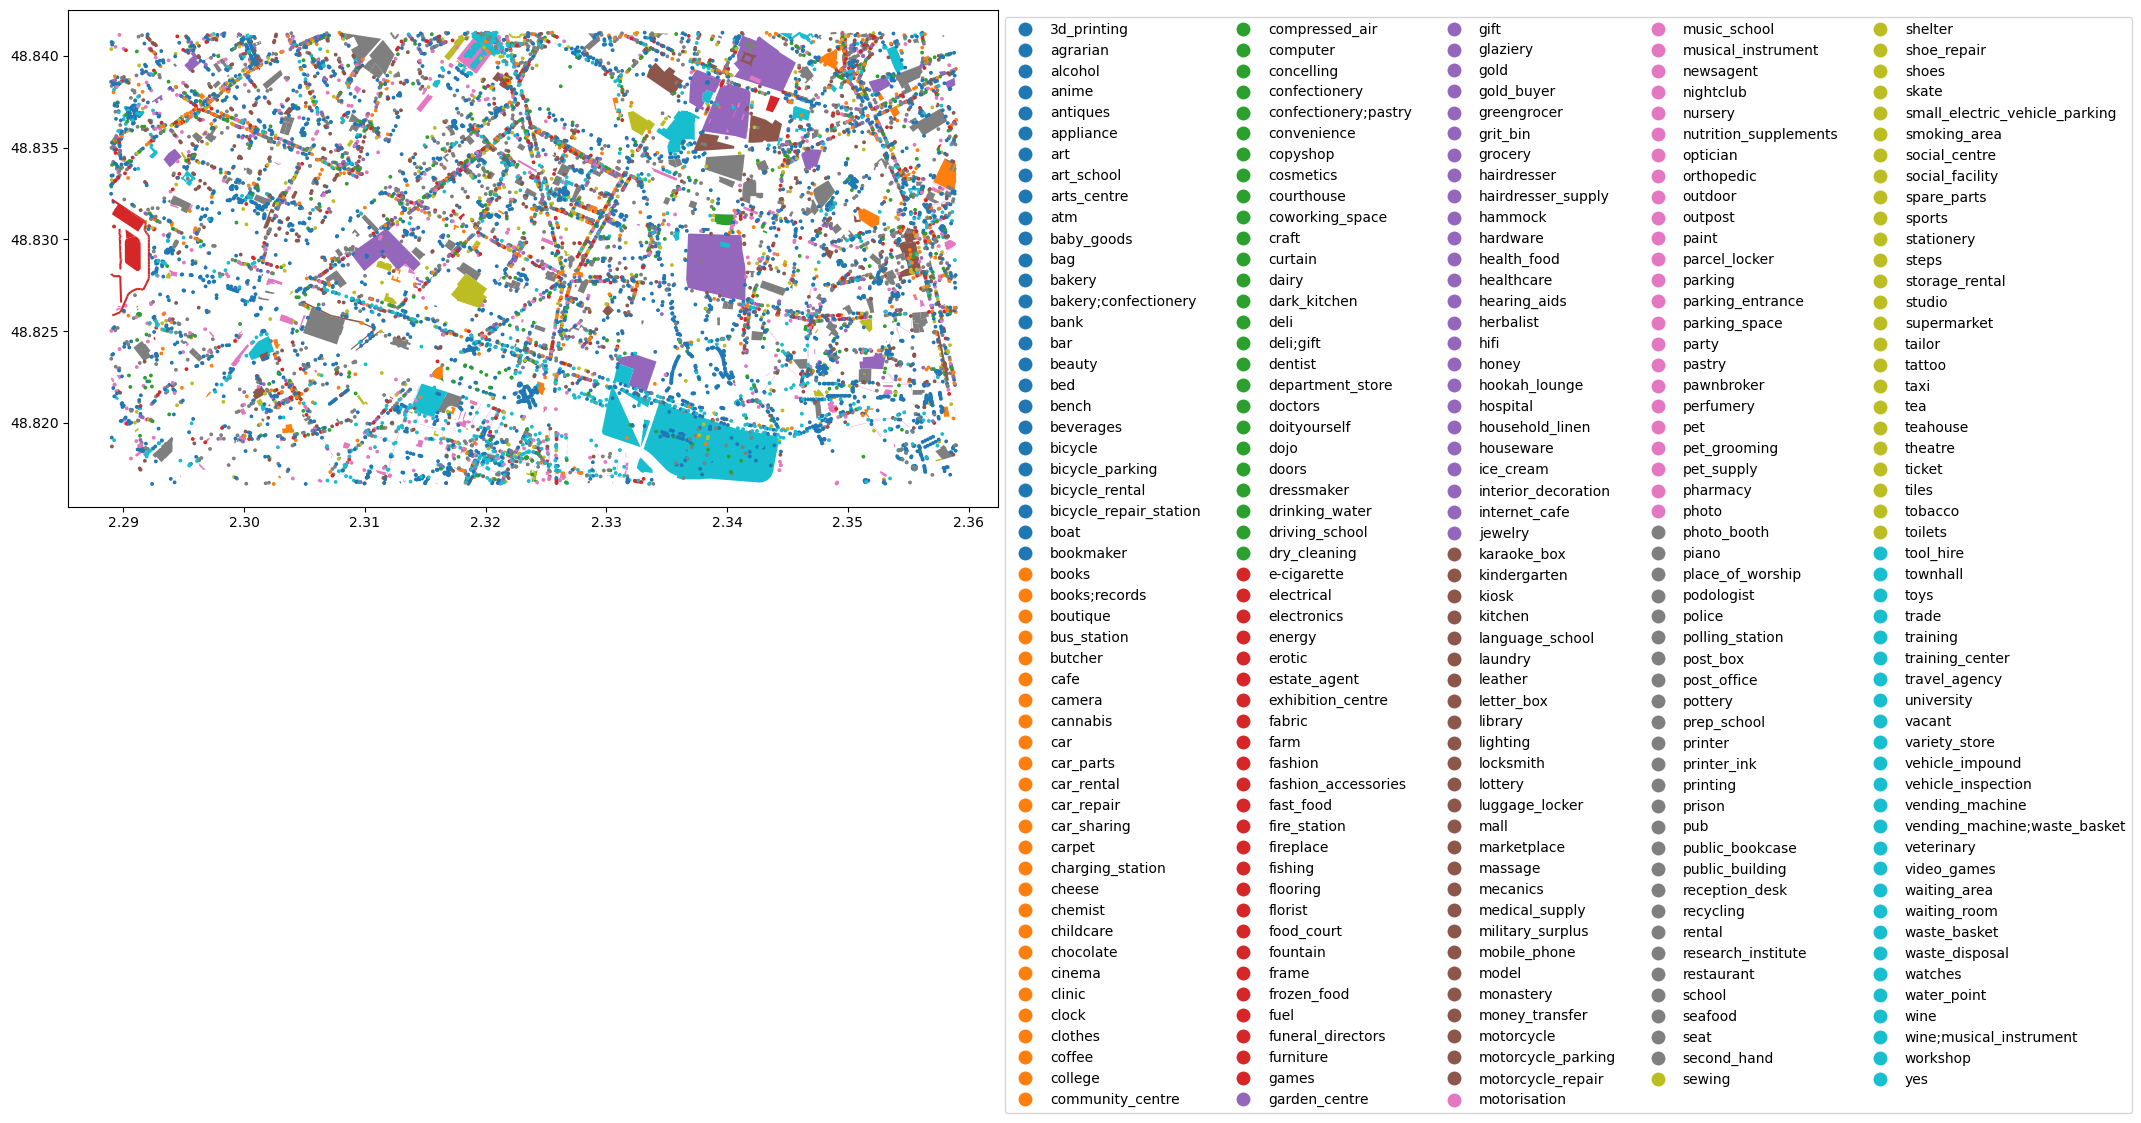

In [9]:
# By default pyrosm reads all elements having "amenity", "shop" or "tourism" tag
# Here, let's read only "amenity" and "shop" by applying a custom filter that
# overrides the default filtering mechanism
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot
ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

In [10]:
pois

,tags,lon,lat,version,timestamp,changeset,id,addr:city,addr:country,addr:full,...,tobacco,trade,geometry,osm_type,addr:housename,addr:place,building:levels,landuse,supermarket,poi_type
0,"{""brand"":""Total"",""compressed_air"":""yes"",""fuel:...",2.315823,48.831581,0,0,0.0,66492656,None,None,None,...,None,None,POINT (2.31582 48.83158),node,NaN,NaN,NaN,NaN,NaN,fuel
1,"{""backrest"":""yes""}",2.312375,48.837723,0,0,0.0,139254447,None,None,None,...,None,None,POINT (2.31238 48.83772),node,NaN,NaN,NaN,NaN,NaN,bench
2,"{""noname"":""yes""}",2.316569,48.831444,0,0,0.0,158268042,None,None,None,...,None,None,POINT (2.31657 48.83144),node,NaN,NaN,NaN,NaN,NaN,school
3,"{""alt_name"":""Le Moulin Vert"",""cuisine"":""pizza""...",2.322866,48.829834,0,0,0.0,158603712,None,None,None,...,None,None,POINT (2.32287 48.82983),node,NaN,NaN,NaN,NaN,NaN,restaurant
4,"{""cuisine"":""french""}",2.324533,48.831989,0,0,0.0,175539450,None,None,None,...,None,None,POINT (2.32453 48.83199),node,NaN,NaN,NaN,NaN,NaN,restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12759,"{""brand"":""Relay"",""brand:wikidata"":""Q3424298"",""...",NaN,NaN,-1,0,0.0,18706548164,None,NaN,NaN,...,NaN,NaN,"POLYGON ((2.31994 48.84126, 2.31994 48.84126, ...",relation,NaN,NaN,NaN,NaN,NaN,newsagent
12760,"{""indoor"":""room"",""level"":""0"",""type"":""multipoly...",NaN,NaN,-1,0,0.0,18720694298,None,NaN,NaN,...,NaN,NaN,"POLYGON ((2.32024 48.84095, 2.32028 48.84093, ...",relation,NaN,NaN,NaN,NaN,NaN,greengrocer
12761,"{""disused:amenity"":""fast_food"",""disused:name"":...",NaN,NaN,-1,0,0.0,18763214222,None,NaN,NaN,...,NaN,NaN,"POLYGON ((2.32097 48.84100, 2.32098 48.84101, ...",relation,NaN,NaN,NaN,NaN,NaN,vacant
12762,"{""indoor"":""area"",""layer"":""-1"",""level"":""-1"",""ty...",NaN,NaN,-1,0,0.0,18805791010,None,NaN,NaN,...,NaN,NaN,"POLYGON ((2.31984 48.84099, 2.31986 48.84100, ...",relation,NaN,NaN,NaN,NaN,NaN,parking


C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\pyrosm\pyrosm.py:323: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_landuse_data(
C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


<AxesSubplot:>

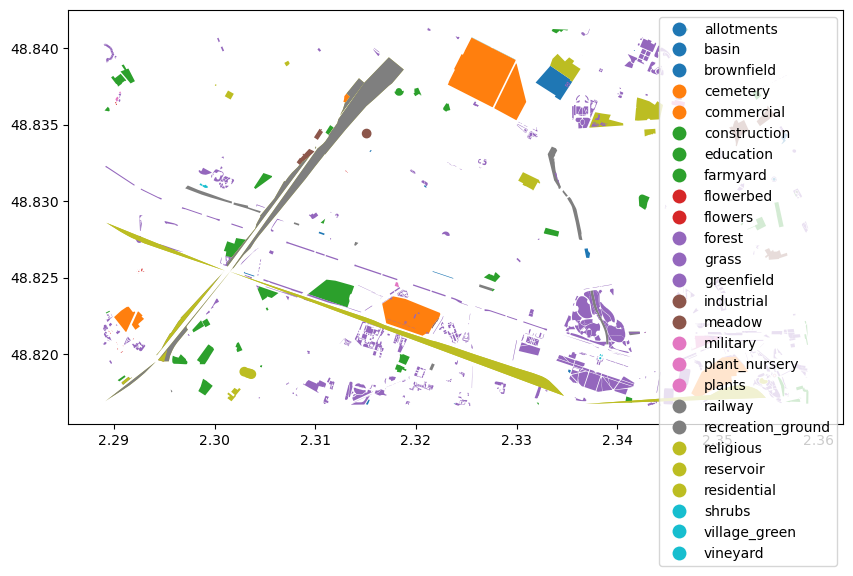

In [11]:
landuse = osm.get_landuse()
landuse.plot(column='landuse', legend=True, figsize=(10,6))

In [12]:
landuse

,tags,lon,lat,version,timestamp,changeset,id,industrial,landuse,residential,geometry,osm_type,construction
0,"{""addr:housenumber"":""1bis"",""source"":""cadastre-...",2.303500,48.818718,0,0,0.0,2833534364,None,residential,apartments,POINT (2.30350 48.81872),node,NaN
1,"{""addr:housenumber"":""5"",""source"":""cadastre-dgi...",2.303651,48.818684,0,0,0.0,2833534365,None,residential,apartments,POINT (2.30365 48.81868),node,NaN
2,"{""addr:housenumber"":""3"",""source"":""survey""}",2.302951,48.818844,0,0,0.0,2833546922,None,residential,apartments,POINT (2.30295 48.81884),node,NaN
3,None,2.303304,48.818756,0,0,0.0,6409555369,None,residential,apartments,POINT (2.30330 48.81876),node,NaN
4,None,2.315104,48.834415,0,0,0.0,8523815602,scrap_yard,industrial,None,POINT (2.31510 48.83442),node,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,"{""source"":""cadastre-dgi-fr source : Direction ...",NaN,NaN,-1,0,0.0,16930575594,NaN,residential,urban,"MULTIPOLYGON (((2.29092 48.81799, 2.29077 48.8...",relation,NaN
900,"{""leaf_type"":""mixed"",""source"":""BDOrtho IGN"",""t...",NaN,NaN,-1,0,0.0,17576841850,NaN,forest,None,"POLYGON ((2.34065 48.82177, 2.34069 48.82167, ...",relation,NaN
901,"{""type"":""multipolygon""}",NaN,NaN,-1,0,0.0,17590179781,NaN,grass,None,"POLYGON ((2.35389 48.81841, 2.35397 48.81843, ...",relation,NaN
902,"{""type"":""multipolygon""}",NaN,NaN,-1,0,0.0,17603526925,NaN,grass,None,"POLYGON ((2.34771 48.81943, 2.34765 48.81947, ...",relation,NaN


C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\pyrosm\pyrosm.py:382: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_natural_data(
C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


<AxesSubplot:>

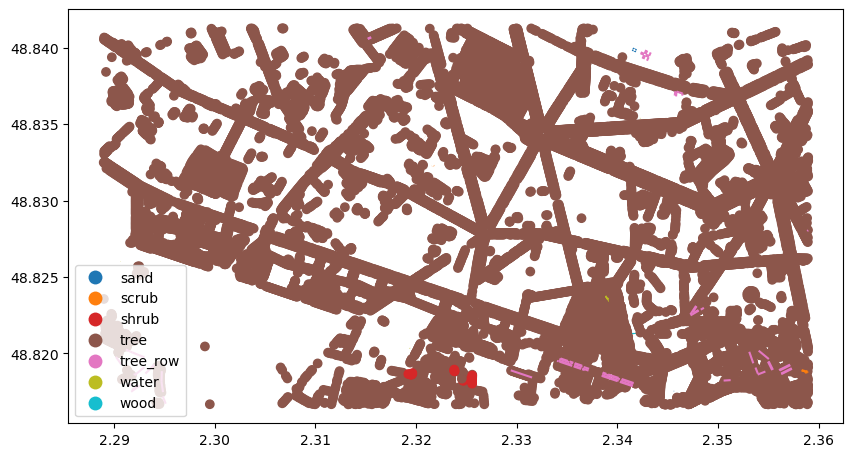

In [13]:
natural = osm.get_natural()
natural.plot(column='natural', legend=True, figsize=(10,6))


In [14]:
osm.conf.tags.building

['addr:city',
 'addr:country',
 'addr:full',
 'addr:housenumber',
 'addr:housename',
 'addr:postcode',
 'addr:place',
 'addr:street',
 'email',
 'name',
 'opening_hours',
 'operator',
 'phone',
 'ref',
 'url',
 'website',
 'yes',
 'building',
 'amenity',
 'building:flats',
 'building:levels',
 'building:material',
 'building:max_level',
 'building:min_level',
 'building:fireproof',
 'building:use',
 'craft',
 'height',
 'internet_access',
 'landuse',
 'levels',
 'office',
 'operator',
 'shop',
 'source',
 'start_date',
 'wikipedia',
 'id',
 'nodes',
 'timestamp',
 'version',
 'id',
 'nodes',
 'timestamp',
 'version',
 'id',
 'nodes',
 'timestamp',
 'changeset',
 'version',
 'geometry']